# Project : New consulting service at Kickstarter 

## Project Overview : 
    
   Kickstarter is crowdfunding platform which can raise a small financial aid from large number of people throughout the internet. This platform is thinking to create a consulting service to project founder to help its customers create more successful crowdfunding campaigns. 
    
   This assignment based on Kickstarter dataset. This data has several factors: 
    1. the name and the id of project. 
    2. the category, sub-category and the location of project. 
    3. the pledged, goal of pledged, and the status of project. 
    4. the backers, the funder and the date of funder. 
    5. the level and duration of each project. 
    
To provide counsulting service, it is important to clean up the data first for avoding the duplicates and empty data. moreover, filtering the whole data in xls file showed that most of the funding date between 2010 to 2012. Therefore, to select the most updated data, 2012 was chosen to provide a possible conclsion and disicion. 

4 Business questions to ask with Kickstarter data:

   1. what is the best lenght of time to run a successful Kickstarter campaigen ?
   2. what is the ideal pledge goal ? 
   3. what type of projects would be most successful and getting funded ? 
   4. Is there an ideal month/day/time to launch a campaigen? 




## Open the data as pandas Dataframes 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
Kickstarterscrape = pd.read_csv('DSI_kickstarterscrape_dataset.csv',encoding = "cp437")
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from IPython.display import display   # A notebook function to display more complex data (like tables)
import scipy.stats as stats 
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

In [2]:
Kickstarterscrape.info(max_cols=20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45957 entries, 0 to 45956
Data columns (total 17 columns):
project id           45957 non-null int64
name                 45957 non-null object
url                  45957 non-null object
category             45957 non-null object
subcategory          45957 non-null object
location             44635 non-null object
status               45957 non-null object
goal                 45957 non-null float64
pledged              45945 non-null float64
funded percentage    45957 non-null float64
backers              45957 non-null int64
funded date          45957 non-null object
levels               45957 non-null int64
reward levels        45898 non-null object
updates              45957 non-null int64
comments             45957 non-null int64
duration             45957 non-null float64
dtypes: float64(4), int64(5), object(8)
memory usage: 6.0+ MB


In [3]:
Kickstarterscrape.shape

(45957, 17)

In [4]:
Kickstarterscrape.columns

Index(['project id', 'name', 'url', 'category', 'subcategory', 'location',
       'status', 'goal', 'pledged', 'funded percentage', 'backers',
       'funded date', 'levels', 'reward levels', 'updates', 'comments',
       'duration'],
      dtype='object')

In [5]:
Kickstarterscrape.head(10)

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00
5,316217,Dinner Party - a short film about friendship.....,http://www.kickstarter.com/projects/249354515/...,Film & Video,Short Film,"Portland, OR",successful,3500.0,3582.0,1.023331,39,"Wed, 22 Jun 2011 13:33:00 -0000",7,"$5,$25,$50,$100,$250,$500,$1,000",8,0,21.43
6,325034,Mezzo,http://www.kickstarter.com/projects/geoffsaysh...,Film & Video,Short Film,"Collegedale, TN",failed,1000.0,280.0,0.280000,8,"Sat, 18 Feb 2012 02:17:08 -0000",5,"$5,$10,$25,$50,$100",0,0,30.00
7,407836,Help APORTA continue to make handwoven/knit ac...,http://www.kickstarter.com/projects/1078097864...,Fashion,Fashion,"Chicago, IL",successful,2000.0,2180.0,1.090000,46,"Fri, 30 Dec 2011 04:36:53 -0000",7,"$10,$20,$50,$100,$250,$500,$1,000",13,5,30.00
8,436325,Music - Comedy - Album!,http://www.kickstarter.com/projects/mattgriffo...,Music,Music,"Chicago, IL",successful,1000.0,1125.0,1.125000,30,"Sun, 18 Apr 2010 04:59:00 -0000",12,"$5,$8,$10,$15,$20,$30,$50,$100,$120,$250,$500,...",10,1,67.53
9,610918,The Apocalypse Calendar,http://www.kickstarter.com/projects/tqvinn/the...,Art,Illustration,"Chicago, IL",successful,7500.0,9836.0,1.311527,255,"Tue, 01 Nov 2011 04:59:00 -0000",10,"$1,$20,$35,$50,$60,$100,$110,$500,$1,000,$1,500",6,5,35.29


In [6]:
Kickstarterscrape.describe(include='all')

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
count,4.595700e+04,45957,45957,45957,45957,44635,45957,4.595700e+04,4.594500e+04,45957.000000,45957.000000,45957,45957.000000,45898,45957.00000,45957.000000,45957.000000
unique,NaN,45754,45814,14,51,4849,5,NaN,NaN,NaN,NaN,41068,NaN,28378,NaN,NaN,NaN
top,NaN,Black Storm,http://www.kickstarter.com/projects/foriknowmy...,Film &amp; Video,Documentary,"Los Angeles, CA",successful,NaN,NaN,NaN,NaN,"Sun, 01 Jan 2012 04:59:00 -0000",NaN,"$10,$25,$50,$100,$250,$500,$1,000",NaN,NaN,NaN
freq,NaN,3,2,13053,4012,3927,22969,NaN,NaN,NaN,NaN,44,NaN,369,NaN,NaN,NaN
mean,1.080800e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.194271e+04,4.980750e+03,1.850129,69.973192,NaN,8.004939,NaN,4.08508,8.379529,39.995547
std,6.218057e+08,NaN,NaN,NaN,NaN,NaN,NaN,1.887583e+05,5.674162e+04,88.492706,688.628479,NaN,4.233907,NaN,6.43922,174.015737,17.414458
min,3.940900e+04,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e-02,0.000000e+00,0.000000,0.000000,NaN,0.000000,NaN,0.00000,0.000000,1.000000
25%,5.438962e+08,NaN,NaN,NaN,NaN,NaN,NaN,1.800000e+03,1.960000e+02,0.044000,5.000000,NaN,5.000000,NaN,0.00000,0.000000,30.000000
50%,1.078345e+09,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+03,1.310000e+03,1.000000,23.000000,NaN,7.000000,NaN,2.00000,0.000000,32.000000
75%,1.621596e+09,NaN,NaN,NaN,NaN,NaN,NaN,9.862000e+03,4.165000e+03,1.115640,59.000000,NaN,10.000000,NaN,6.00000,3.000000,48.390000


In [7]:
Kickstarterscrape.dtypes

project id             int64
name                  object
url                   object
category              object
subcategory           object
location              object
status                object
goal                 float64
pledged              float64
funded percentage    float64
backers                int64
funded date           object
levels                 int64
reward levels         object
updates                int64
comments               int64
duration             float64
dtype: object

## Some categorical columns need to be converted into numeric. and strip any sign out of it like $

In [8]:
Kickstarterscrape['reward levels'].head()

0                 $25,$50,$100,$250,$500,$1,000,$2,500
1                                    $1,$5,$10,$25,$50
2    $1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001
3    $1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...
4                           $10,$25,$50,$100,$150,$250
Name: reward levels, dtype: object

In [9]:
def dollars_to_float(value):

    # try to convert the inputted value to a float
    try:
        return float(value.strip('$').rstrip(','))
        #return float(value.replace('$', "").replace(',',""))

    # in the case of the value being a null value, we simply return a null
    except:
        return np.nan


Kickstarterscrape['reward levels'] = Kickstarterscrape['reward levels'].apply(dollars_to_float)

In [10]:
Kickstarterscrape['reward levels'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: reward levels, dtype: float64

In [11]:
len(Kickstarterscrape["project id"].unique()) , Kickstarterscrape.shape

#we found out there is 142 has a duplicate project id 

(45815, (45957, 17))

In [12]:
#Review for possible duplicates and erroneous data.
Kickstarterscrape.duplicated().sum()

89

In [13]:
#remove all the duplicated data based on id
Kickstarterscrape.drop_duplicates(subset ="project id", 
                     keep = False, inplace = True) 

In [14]:
Kickstarterscrape.duplicated().sum()

0

In [15]:
Kickstarterscrape.isnull().sum()

project id               0
name                     0
url                      0
category                 0
subcategory              0
location              1314
status                   0
goal                     0
pledged                 12
funded percentage        0
backers                  0
funded date              0
levels                   0
reward levels        44608
updates                  0
comments                 0
duration                 0
dtype: int64

In [16]:
#the pledge is like formal promise from the organization to keep a promise or deal with issues.
#we need to drop null value becuase it will not help us. 

Kickstarterscrape = Kickstarterscrape[pd.notnull(Kickstarterscrape['pledged'])]

In [17]:
Kickstarterscrape.shape

(45661, 17)

In [18]:
Kickstarterscrape.isnull().sum()

project id               0
name                     0
url                      0
category                 0
subcategory              0
location              1314
status                   0
goal                     0
pledged                  0
funded percentage        0
backers                  0
funded date              0
levels                   0
reward levels        44596
updates                  0
comments                 0
duration                 0
dtype: int64

## Filter data for analysis 

we need to select the day/time/ month that is >2012 

In [19]:
Kickstarterscrape.shape

(45661, 17)

In [20]:
Kickstarterscrape.columns

Index(['project id', 'name', 'url', 'category', 'subcategory', 'location',
       'status', 'goal', 'pledged', 'funded percentage', 'backers',
       'funded date', 'levels', 'reward levels', 'updates', 'comments',
       'duration'],
      dtype='object')

In [21]:
Kickstarterscrape.describe().T

,count,mean,std,min,25%,50%,75%,max
project id,45661.0,1.074152e+09,6.180320e+08,39409.00,5.405300e+08,1.070694e+09,1.611202e+09,2.147460e+09
goal,45661.0,1.194629e+04,1.893493e+05,0.01,1.800000e+03,4.000000e+03,9.850000e+03,2.147484e+07
pledged,45661.0,4.990760e+03,5.691616e+04,0.00,1.950000e+02,1.310000e+03,4.159000e+03,1.026684e+07
funded percentage,45661.0,1.844529e+00,8.875988e+01,0.00,4.375000e-02,1.000000e+00,1.115401e+00,1.506600e+04
backers,45661.0,6.957651e+01,6.896721e+02,0.00,5.000000e+00,2.300000e+01,5.900000e+01,8.714200e+04
levels,45661.0,8.000679e+00,4.230795e+00,0.00,5.000000e+00,7.000000e+00,1.000000e+01,8.000000e+01
reward levels,1065.0,3.242629e+01,6.903557e+01,1.00,5.000000e+00,1.500000e+01,2.500000e+01,9.500000e+02
updates,45661.0,4.080200e+00,6.437251e+00,0.00,0.000000e+00,2.000000e+00,6.000000e+00,1.490000e+02
comments,45661.0,8.191980e+00,1.714484e+02,0.00,0.000000e+00,0.000000e+00,3.000000e+00,1.931100e+04
duration,45661.0,3.999448e+01,1.742802e+01,1.00,3.000000e+01,3.199000e+01,4.840000e+01,9.196000e+01


## what is the mean (total) pledge that projects get ? 

In [22]:
x = Kickstarterscrape["pledged"].values
x.mean(axis = 0)

4990.759685508421

In [23]:
Kickstarterscrape['pledged'].std()

56916.15812971811

## Create a histogram that shows the distribution for number of backers, what is the skew of the distribution? 

In [24]:
Kickstarterscrape.skew(axis=None, skipna=None, level=None, numeric_only=None)

project id            -0.006195
goal                 101.216942
pledged              138.084268
funded percentage    140.447496
backers               87.625234
levels                 2.578600
reward levels          6.203404
updates                4.014642
comments              71.522540
duration               1.078991
dtype: float64

In [25]:
x = Kickstarterscrape["backers"].values
x.mean(axis = 0)

69.5765094938788

In [26]:
Kickstarterscrape['backers'].std()

689.6721377891567

In [27]:
from scipy.stats import skew
from scipy.stats import kurtosis
Kickstarterscrape.skew(axis = 0, skipna = True) 

project id            -0.006195
goal                 101.216942
pledged              138.084268
funded percentage    140.447496
backers               87.625234
levels                 2.578600
reward levels          6.203404
updates                4.014642
comments              71.522540
duration               1.078991
dtype: float64

In [28]:
x = np.linspace( -5, 5, 1000 )
y = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x)**2  )  # normal distribution
plt.show()
Kickstarterscrape.skew(axis=None, skipna=None, level=None, numeric_only=None)

#Five-number summary:
#min = minimum value
#25% = first quartile (Q1) = median of the lower half of the data
#50% = second quartile (Q2) = median of the data
#75% = third quartile (Q3) = median of the upper half of the data
#max = maximum value
#(It's more useful than mean and standard deviation for describing skewed distributions.)

project id            -0.006195
goal                 101.216942
pledged              138.084268
funded percentage    140.447496
backers               87.625234
levels                 2.578600
reward levels          6.203404
updates                4.014642
comments              71.522540
duration               1.078991
dtype: float64

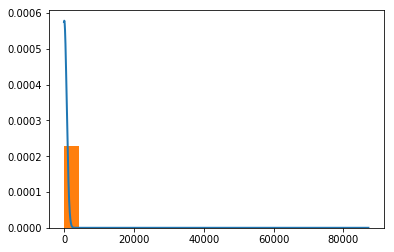

project id            -0.006195
goal                 101.216942
pledged              138.084268
funded percentage    140.447496
backers               87.625234
levels                 2.578600
reward levels          6.203404
updates                4.014642
comments              71.522540
duration               1.078991
dtype: float64

In [29]:
import scipy.stats as stats
 
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(Kickstarterscrape['backers'].dropna())
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2)
plt.hist(h,normed=True,bins = 20)      
plt.show()

Kickstarterscrape.skew(axis=None, skipna=None, level=None, numeric_only=None)


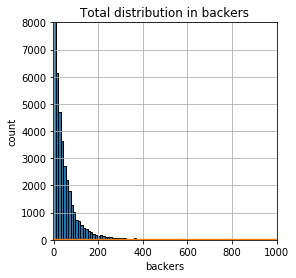

In [30]:
Kickstarterscrape["backers"].hist(figsize=(4,4), bins=8000, edgecolor="#000000");
plt.xlabel('backers')
plt.ylabel('count')
plt.title('Total distribution in backers')
plt.ylim(0,8000);
plt.xlim(-1,1000);
plt.style.use("ggplot")
plt.plot(h,fit,'-',linewidth = 2)     
plt.show()

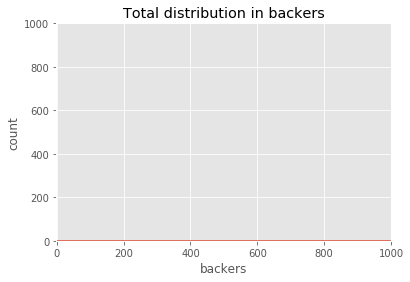

In [31]:
sns.distplot(Kickstarterscrape['backers']);
plt.xlabel('backers')
plt.ylabel('count')
plt.title('Total distribution in backers')
plt.ylim(0,1000);
plt.xlim(-1,1000);
plt.style.use("ggplot")

## What is the best lenght of time to run a successful campaign? 

       status   duration
1      failed  42.978156
0    canceled  39.432456
3  successful  37.962447
2        live  37.454123
4   suspended  30.000000


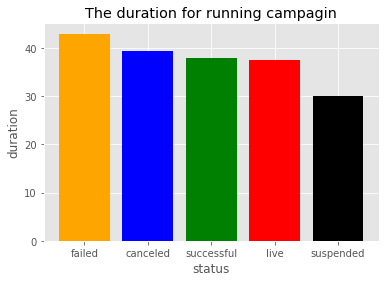

In [34]:
# you need to do dorup by based on status or select the successul status only. ( overall figure)

campagin_status = Kickstarterscrape[['status', 'duration']].groupby(['status'],as_index=False).mean().sort_values(by='duration',ascending=False)
print(campagin_status)
plt.bar(campagin_status.iloc[:,0],campagin_status.iloc[:,1],color=['orange','blue','green','red','black'])
plt.xlabel('status')
plt.ylabel('duration')
plt.title('The duration for running campagin')
plt.show()

to run a successful campagin:
 - select the successful campgin only by drop or remove the other status. 
 - then see the successful status based on pledged 

In [35]:
Kickstarterscrape.status.value_counts() 

successful    22835
failed        18882
live           3883
canceled         57
suspended         4
Name: status, dtype: int64

In [36]:
Kickstarterscrape =  Kickstarterscrape[Kickstarterscrape['status'].str.contains("successful")]

In [37]:
Kickstarterscrape['status'].head(5) , Kickstarterscrape['status'].tail(5)

(0    successful
 3    successful
 5    successful
 7    successful
 8    successful
 Name: status, dtype: object, 45948    successful
 45951    successful
 45952    successful
 45954    successful
 45956    successful
 Name: status, dtype: object)

In [38]:
len(Kickstarterscrape)

22835

## Is the duration variable normally distributed ? 

In [39]:
#you can see the noramal distribution by value.count 

Kickstarterscrape['duration'].value_counts()

30.00    5022
60.00     905
45.00     789
29.96     682
40.00     388
30.04     384
60.04     333
31.00     297
59.96     288
35.00     254
21.00     233
20.00     176
90.00     176
25.00     159
44.96     154
14.00     146
45.04     145
15.00     144
30.96     131
90.96     111
32.00      96
50.00      94
60.96      90
33.00      82
40.04      78
10.00      71
28.00      69
39.96      66
31.96      65
45.96      58
         ... 
46.45       1
42.05       1
47.06       1
50.31       1
14.83       1
63.62       1
60.81       1
71.99       1
29.60       1
51.92       1
47.24       1
69.24       1
38.89       1
23.31       1
20.20       1
44.22       1
32.60       1
60.22       1
39.48       1
46.70       1
7.96        1
34.80       1
26.27       1
44.24       1
88.96       1
13.72       1
45.11       1
37.39       1
51.76       1
56.92       1
Name: duration, Length: 4740, dtype: int64

Text(0.5, 1.0, 'Total distribution in duration')

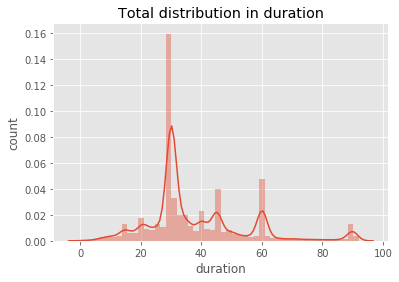

In [40]:
sns.distplot(Kickstarterscrape['duration']);
plt.xlabel('duration')
plt.ylabel('count')
plt.title('Total distribution in duration')


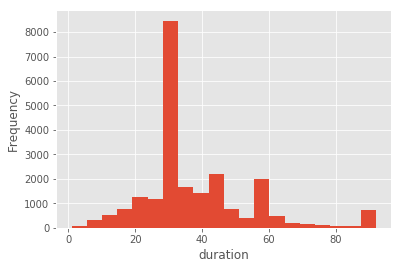

In [41]:
Kickstarterscrape.duration.plot(kind='hist', bins=20);
plt.xlabel('duration');
plt.ylabel('Frequency');
 

In [42]:
Kickstarterscrape.duration.mean()

37.962446682723645

In [43]:
Kickstarterscrape.duration.mode()

0    30.0
dtype: float64

In [44]:
Kickstarterscrape.duration.median()

31.0

In [45]:
Kickstarterscrape.duration.std()

16.649702656916432

if you could collect data on another attribute of these projects, what would it be and why ? 

It would be useful to use the xls files becuase i can calculate the mean, stdv, normal distribution or i can use SPSS programm altough it is piad programm but it is very useful for statistical analysis. 

what is the best lenght of time to run a successful Kickstarter campaigen ?

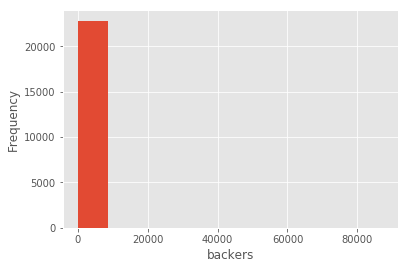

In [46]:
Kickstarterscrape.backers.plot(kind='hist', bins=10);
plt.xlabel('backers');
plt.ylabel('Frequency');

In [53]:
campagin_status = Kickstarterscrape[['status', 'duration','funded percentage']]
.groupby(['status'], as_index=False).mean().sort_values(by='duration',ascending=False)
print(campagin_status)

       status   duration  funded percentage
0  successful  37.962447           3.525732


what is the ideal pledge goal ?

In [96]:
#based on status you can detect the pledge goal.  

campagin_goal = Kickstarterscrape[[ 'goal','pledged','backers',
                                   'category','funded percentage']]
.groupby(['category'],as_index=False).mean().sort_values(by='goal',ascending=False)
campagin_goal.head(5)

,category,goal,pledged,backers,funded percentage
8,Games,12973.199362,36230.283892,765.977671,3.317035
12,Technology,11382.000418,31289.181185,352.592334,2.606655
3,Design,9035.838866,42939.970954,480.769018,7.579414
7,Food,7754.867812,9303.167951,117.285054,1.961126
5,Film & Video,7228.549327,9235.699552,107.143498,1.272732


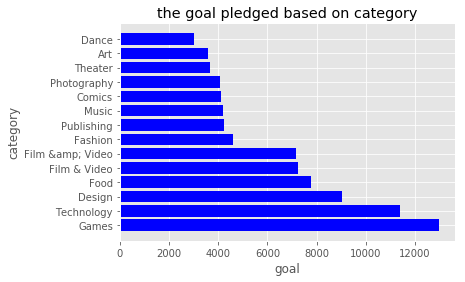

In [97]:
plt.barh(campagin_goal.iloc[:,0],campagin_goal.iloc[:,1],color=['blue'])
plt.xlabel('goal')
plt.ylabel('category')
plt.title('the goal pledged based on category')
plt.xticks(rotation=0)
plt.show()

In [100]:
#based on pledged you can detect the goal.  

campagin_pledged = Kickstarterscrape[['pledged', 'goal','category']]
.groupby(['category'],as_index=False).mean().sort_values(by='goal',ascending=False)
campagin_pledged.head(5)

,category,pledged,goal
8,Games,36230.283892,12973.199362
12,Technology,31289.181185,11382.000418
3,Design,42939.970954,9035.838866
7,Food,9303.167951,7754.867812
5,Film & Video,9235.699552,7228.549327


what the type of projects whould be most successful at getting funded? 

In [93]:
#name of project based on category and subcategory for most sucessful one. 

campagin_project = Kickstarterscrape[['category','subcategory','funded percentage',
                                      'name','project id']].groupby(['category','subcategory'], 
as_index=True).mean().sort_values(by='funded percentage',ascending=False)
campagin_project.head(5)  #here did not count the highest fund at all. need to do more work to analyse the data 

funded percentage    project id
category         subcategory                                    
Art              Conceptual Art         106.097354  1.027669e+09
Design           Graphic Design          19.206913  1.067820e+09
Film &amp; Video Narrative Film          13.216970  1.114365e+09
                 Documentary             10.136208  1.098183e+09
Publishing       Publishing               8.045268  1.142758e+09

In [95]:
best_project=Kickstarterscrape.groupby('category')['funded percentage']
.mean().sort_values(ascending=False).\
head(20).reset_index(name='highest funded project')
best_project.head(10) #type of project that get the highest funded 

,category,highest funded project
0,Design,7.579414
1,Art,6.805052
2,Film &amp; Video,5.273525
3,Comics,3.947579
4,Games,3.317035
5,Fashion,3.201011
6,Technology,2.606655
7,Publishing,2.452996
8,Food,1.961126
9,Theater,1.913194


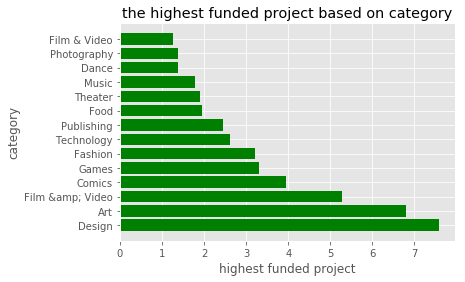

In [104]:
plt.barh(best_project.iloc[:,0],best_project.iloc[:,1],color=['green'])
plt.xlabel('highest funded project')
plt.ylabel('category')
plt.title('the highest funded project based on category')
plt.xticks(rotation=0)
plt.show()

Is there an ideal month/day/time to launch a campagin ? 

In [105]:
#based on duration and successful fund of project name 
#we can assume the day/time/month 
best_time=Kickstarterscrape.groupby('funded date')['backers']
.mean().sort_values(ascending=False).\
head(20).reset_index(name='best funded project')
best_time.head(10)

,funded date,best funded project
0,"Wed, 14 Mar 2012 00:00:00 -0000",87142.000000
1,"Tue, 17 Apr 2012 12:05:42 -0000",61290.000000
2,"Sun, 29 Apr 2012 06:59:00 -0000",36276.000000
3,"Sat, 19 May 2012 03:00:00 -0000",22999.666667
4,"Tue, 21 Feb 2012 17:03:01 -0000",14952.000000
5,"Wed, 02 May 2012 16:30:08 -0000",14081.000000
6,"Sun, 06 May 2012 19:23:29 -0000",13647.000000
7,"Fri, 17 Dec 2010 04:02:14 -0000",13512.000000
8,"Sat, 11 Feb 2012 20:01:11 -0000",12521.000000
9,"Fri, 20 Apr 2012 23:00:00 -0000",10057.000000


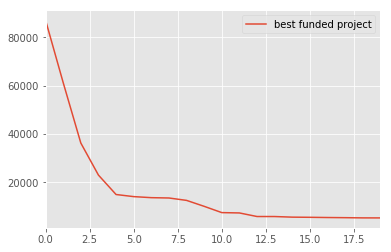

In [112]:
best_time.sort_index().plot();

In [118]:
best_time=Kickstarterscrape.groupby('category')['backers']
.mean().sort_values(ascending=False).\
head(20).reset_index(name='best funded project')
best_time.head(5)

,category,best funded project
0,Games,765.977671
1,Design,480.769018
2,Technology,352.592334
3,Comics,171.365385
4,Food,117.285054
